# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#import sqlite3
import pandas as pd
import numpy as np
import nltk
#import string
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
#from gensim.models import KeyedVectors

# from plotly import plotly
# import plotly.offline as offline
# import plotly.graph_objs as go
# offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv(r"D:\Applied AI\Datasets and DB\Assignment 8 Naive Bayes- Donor Choose\train_data.csv", sep = ',')
resource_data = pd.read_csv(r"D:\Applied AI\Datasets and DB\Assignment 8 Naive Bayes- Donor Choose\resources.csv")

In [4]:
print(project_data.shape)
project_data['id'].unique().shape

(109248, 17)


(109248,)

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :\n", project_data.columns.values);print("\n\n")
project_data.head()

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data :
 ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']





,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [6]:
print("Number of data points in 'resource data'", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in 'resource data' (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 1.2 Data Analysis

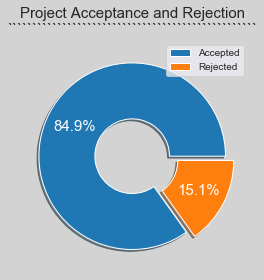

In [7]:
y_value_counts = project_data['project_is_approved'].value_counts()
perc_accepted = round((y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100, 1)
perc_rejected = round((y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100, 1)
lgnd = ['Accepted', 'Rejected']
plt.figure(figsize = (4, 4), facecolor = 'lightgrey')
sb.set_style('darkgrid')
plt.title('Project Acceptance and Rejection\n{}'.format("`"*50), fontdict = dict(fontsize = 15))

plt.pie(y_value_counts, wedgeprops = {'width': 0.6}, shadow = True, explode = np.array([0, .10]), 
       textprops= dict(color = 'white', size = 15), autopct='%1.1f%%', pctdistance = 0.7)

plt.legend(lgnd, loc = 'upper right')
plt.tight_layout()
plt.show()


### 1.2.1 Univariate Analysis: School State

In [8]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

temp.head()

,state_code,num_proposals
0,AK,0.840580
1,AL,0.854711
2,AR,0.831268
3,AZ,0.838379
4,CA,0.858136


In [9]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


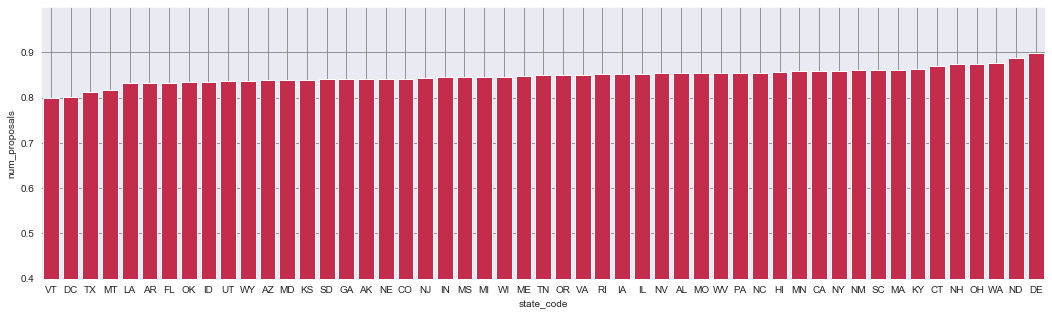

In [10]:
#univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

plt.figure(figsize = (18, 5))
sb.set_style('dark')
plt.yticks(np.arange(.4, 1, .1))
plt.ylim(bottom = .40, top= 1)
sb.barplot(y = temp.num_proposals, x = temp.state_code, color= "crimson")
plt.grid('show', color = 'grey')

plt.show()

__Every state is having more than 80% success (acceptance) rate__

### 1.2.3 Univariate Analysis: project_grade_category

In [11]:
pgc_app_rej = pd.DataFrame(project_data.groupby("project_grade_category")["project_is_approved"].apply(np.mean)).reset_index()
pgc_app_rej.columns = ['state_code', 'num_proposals']


In [12]:
pgc_app_rej = pd.DataFrame(project_data[['project_grade_category', 'project_is_approved']])

pgc_approved = pgc_app_rej[pgc_app_rej['project_is_approved'] == 1].groupby(by = 'project_grade_category').count().reset_index()
pgc_approved['perc_approval'] = np.array(pgc_approved['project_is_approved'])/np.array(project_data['project_is_approved'].sum())
pgc_approved.sort_values(by = 'perc_approval', inplace = True)

pgc_rejected = pgc_app_rej[pgc_app_rej['project_is_approved'] == 0].groupby(by = 'project_grade_category').count().reset_index()
pgc_rejected['perc_approval'] = np.array(pgc_rejected['project_is_approved'])/np.array(project_data['project_is_approved'].sum())
pgc_rejected.sort_values(by = 'perc_approval', inplace = True)

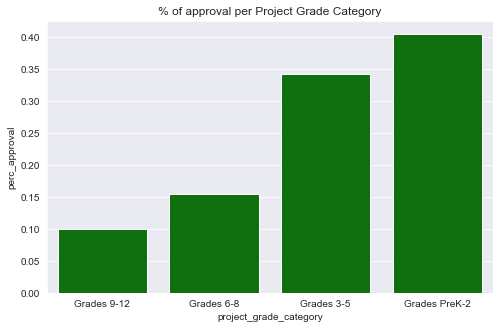

In [13]:
plt.figure(figsize = (8, 5))
sb.set_style('darkgrid')
sb.barplot(y = pgc_approved['perc_approval'], x = pgc_approved['project_grade_category'], color= 'green' )
plt.title('% of approval per Project Grade Category')
plt.show()

<b>Observations:</b><br>
a.) Projects under the Project Grade Category- 'Grades 3-5' and 'Grades PreK-2' has the highest approval percentage<br>
b.) Projects under the Project Grade Category- 'Grades 9-12' and 'Grades 6-8' has comparatively lowest approval percentage

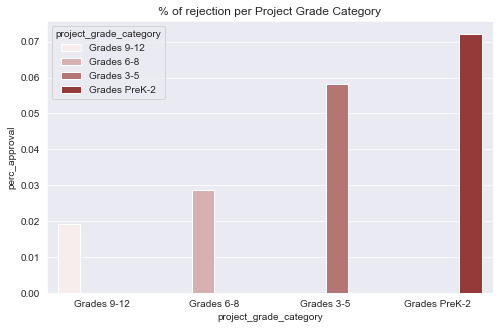

In [14]:
plt.figure(figsize = (8, 5))
sb.set_style('darkgrid')
sb.barplot(y = pgc_rejected['perc_approval'], x = pgc_rejected['project_grade_category'], color= 'brown', 
           hue = pgc_rejected['project_grade_category'], hue_order= pgc_rejected['project_grade_category'].values)
plt.title('% of rejection per Project Grade Category')
plt.show()

In [15]:
project_data['project_subject_categories'].value_counts()

Literacy & Language                           23655
Math & Science                                17072
Literacy & Language, Math & Science           14636
Health & Sports                               10177
Music & The Arts                               5180
Special Needs                                  4226
Literacy & Language, Special Needs             3961
Applied Learning                               3771
Math & Science, Literacy & Language            2289
Applied Learning, Literacy & Language          2191
History & Civics                               1851
Math & Science, Special Needs                  1840
Literacy & Language, Music & The Arts          1757
Math & Science, Music & The Arts               1642
Applied Learning, Special Needs                1467
History & Civics, Literacy & Language          1421
Health & Sports, Special Needs                 1391
Warmth, Care & Hunger                          1309
Math & Science, Applied Learning               1220
Applied Lear

### 1.2.4 Univariate Analysis: project_subject_categories

In [16]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp1 = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp1+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp1 = temp1.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp1.strip())

In [17]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science


In [18]:
cc_accept = project_data[['clean_categories', 'project_is_approved']][project_data['project_is_approved']==1].groupby(by = 'clean_categories').count().reset_index()
cc_reject = project_data[['clean_categories', 'project_is_approved']][project_data['project_is_approved']==0].groupby(by = 'clean_categories').count().reset_index()

cc_accept.sort_values(by = 'project_is_approved', inplace = True)
cc_reject.sort_values(by = 'project_is_approved', inplace = True)

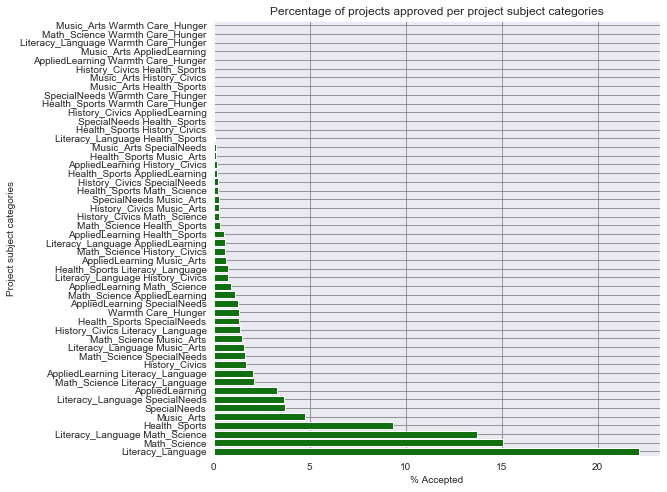

In [19]:
plt.figure(figsize = (8,8))
sb.set_style('darkgrid')
perc_approved = (np.array(cc_accept['project_is_approved'])/cc_accept['project_is_approved'].sum())*100
sb.barplot(y = cc_accept['clean_categories'].to_numpy(), x = perc_approved, color = 'green')
plt.title('Percentage of projects approved per project subject categories')
plt.xlabel('% Accepted')
plt.ylabel('project subject categories'.capitalize())
plt.grid('show', color = 'grey')
plt.show()

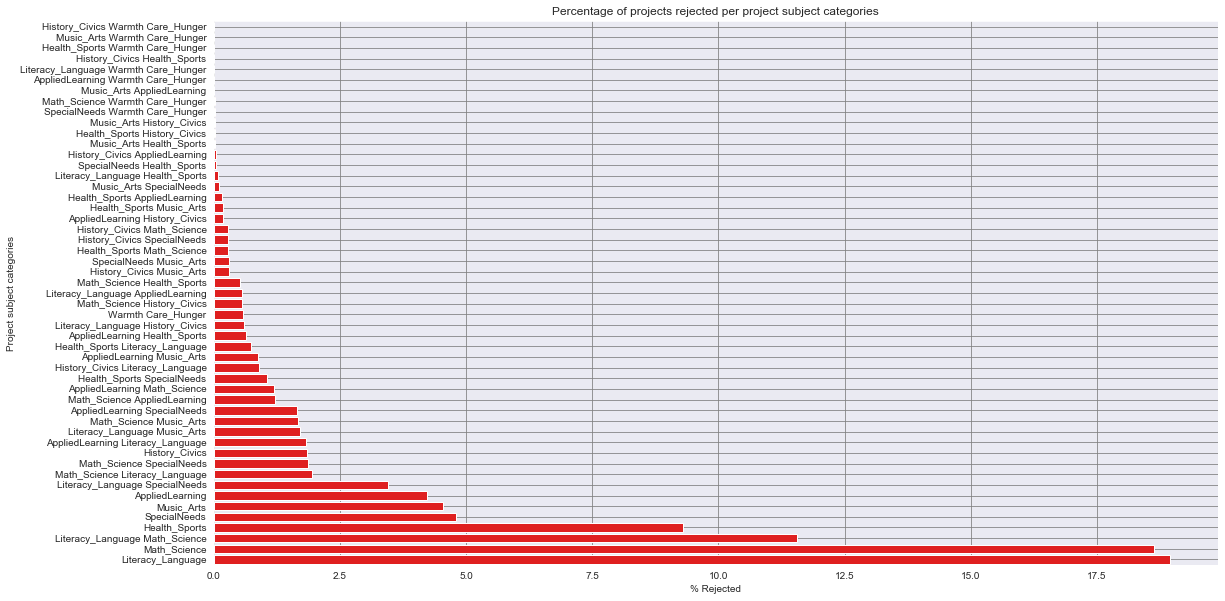

In [20]:
plt.figure(figsize = (18,10))
sb.set_style('darkgrid')
perc_rejected = (np.array(cc_reject['project_is_approved'])/cc_reject['project_is_approved'].sum())*100
sb.barplot(y = cc_reject['clean_categories'].to_list(), x = perc_rejected, color = 'red')

plt.title('Percentage of projects rejected per project subject categories')
plt.xlabel('% Rejected')
plt.ylabel('project subject categories'.capitalize())
plt.grid('show', color = 'grey')
plt.show()

In [21]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())
    #print(my_counter)

In [22]:
#pd.DataFrame(data = dict(my_counter))
my_counter

Counter({'Literacy_Language': 52239,
         'History_Civics': 5914,
         'Health_Sports': 14223,
         'Math_Science': 41421,
         'SpecialNeeds': 13642,
         'AppliedLearning': 12135,
         'Music_Arts': 10293,
         'Warmth': 1388,
         'Care_Hunger': 1388})

In [23]:
project_data['clean_categories'][0:7]

0                 Literacy_Language
1      History_Civics Health_Sports
2                     Health_Sports
3    Literacy_Language Math_Science
4                      Math_Science
5    Literacy_Language SpecialNeeds
6    Literacy_Language SpecialNeeds
Name: clean_categories, dtype: object

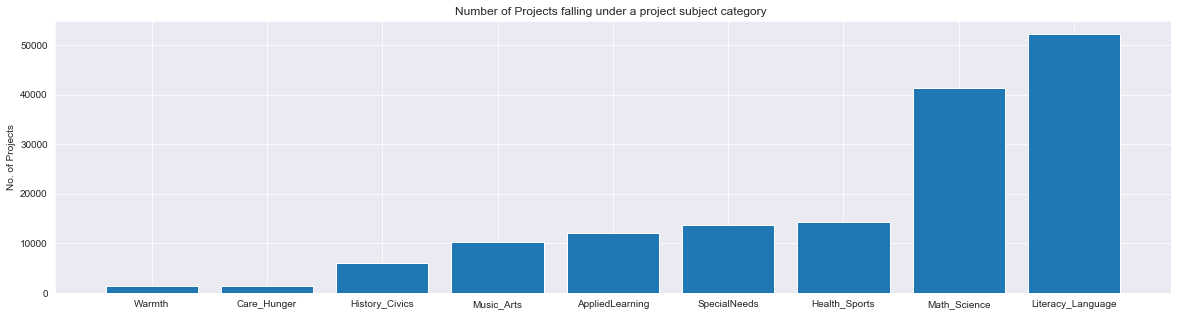

In [24]:
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1])) # sorting a dictionary w.r.t it Value

ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('No. of Projects')
plt.title('Number of Projects falling under a project subject category ')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [25]:
pd.DataFrame(data = {'Project Subject Categories':list(cat_dict.keys()), 'No. of Projects':list(cat_dict.values())})

,Project Subject Categories,No. of Projects
0,Literacy_Language,52239
1,History_Civics,5914
2,Health_Sports,14223
3,Math_Science,41421
4,SpecialNeeds,13642
5,AppliedLearning,12135
6,Music_Arts,10293
7,Warmth,1388
8,Care_Hunger,1388


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [26]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [27]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


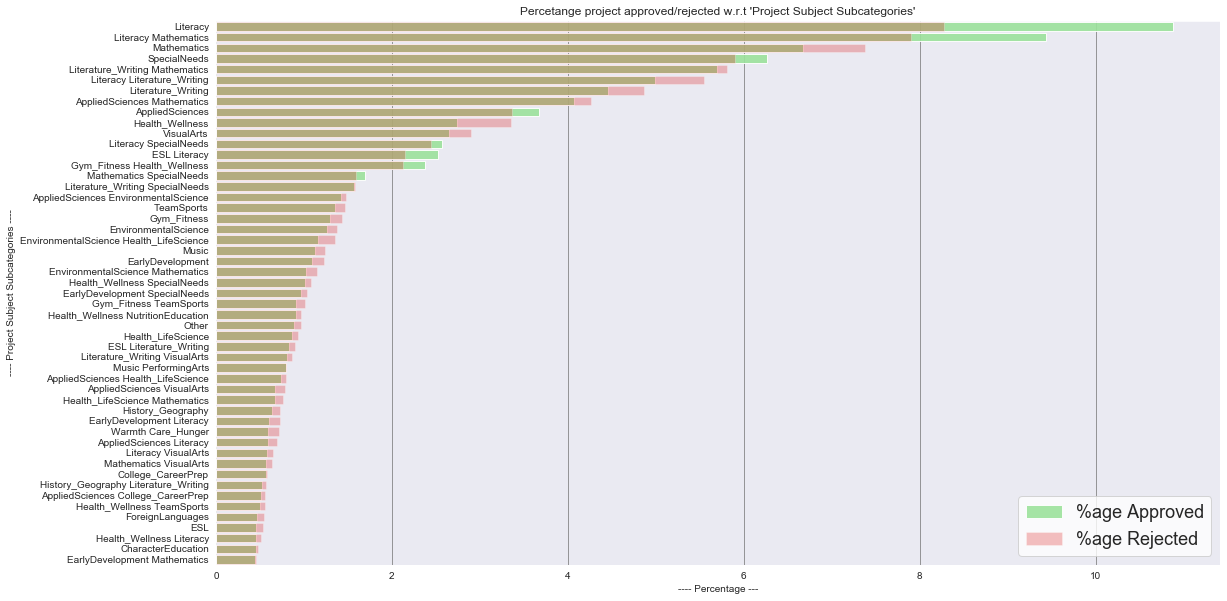

In [28]:
def top50_project_status_per_categ(target_feature= None):
    accepted = project_data[[target_feature, 'project_is_approved']][project_data['project_is_approved'] == 1].groupby(by = target_feature).count().reset_index()
    accepted.sort_values(by = 'project_is_approved', inplace = True, ascending = False)
    accepted = accepted.iloc[:51]
    
    rejected = project_data[[target_feature, 'project_is_approved']][project_data['project_is_approved'] == 0].groupby(by = target_feature).count().reset_index()
    rejected.sort_values(by = 'project_is_approved', inplace = True, ascending = False)
    rejected = rejected.iloc[:51]
    
    perc_acc_per_subcat = np.array((accepted['project_is_approved']/accepted['project_is_approved'].sum())*100)
    per_rej_per_subcat = np.array((rejected['project_is_approved']/rejected['project_is_approved'].sum())*100)

    plt.figure(figsize= (18, 10))
    sb.barplot(x = perc_acc_per_subcat, y = np.array(accepted[target_feature]), color = 'lightgreen', alpha = 0.9, label = '%age Approved')
    plt.grid(b = 'show', color = 'grey')
    plt.title("Percetange project approved/rejected w.r.t 'Project Subject Subcategories'")
    plt.xlabel('---- Percentage ---')
    plt.ylabel('---- Project Subject Subcategories ----')
    #plt.show()
    
    #plt.figure(figsize= (18, 10))
    sb.barplot(x = per_rej_per_subcat, y = np.array(rejected[target_feature]), color = 'red', alpha = 0.28, label = '%age Rejected')
    #plt.grid(b = 'show', color = 'grey')
    #plt.title("Percetange project rejected of total rejected projects w.r.t 'Project Subject Subcategories'")
    #plt.xlabel('Percentage')
    #plt.ylabel('Project Subject Subcategories')
    
    plt.legend(loc='best', fontsize = 18, facecolor = 'white')
    
    plt.show()
    
    
    
top50_project_status_per_categ('clean_subcategories')

In [29]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

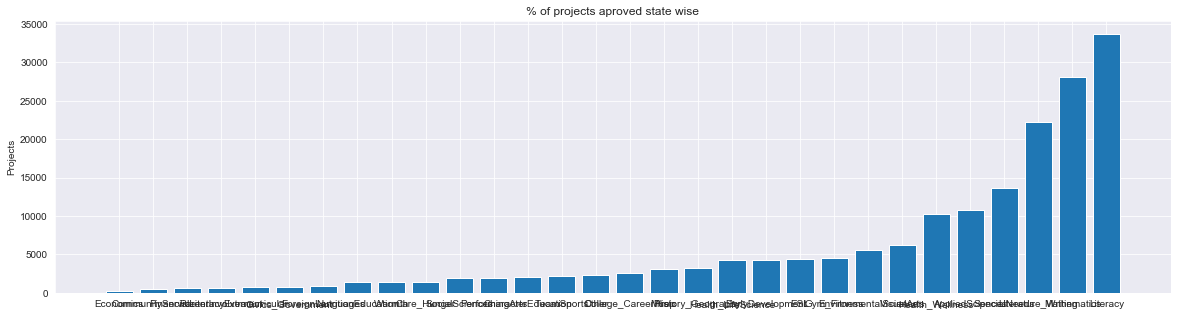

In [30]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [31]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### 1.2.6 Univariate Analysis: Text features (Title)

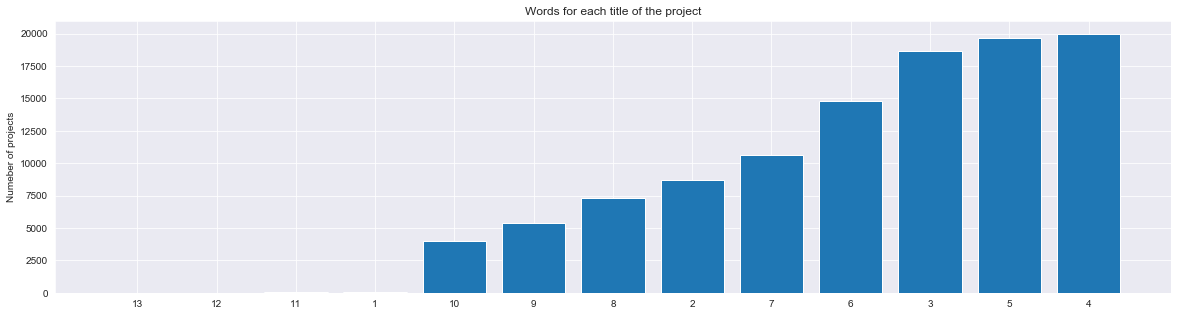

In [32]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [33]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

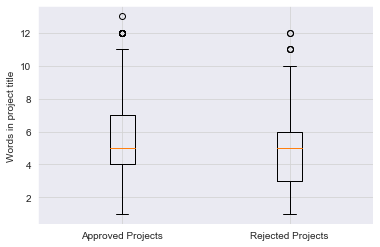

In [34]:
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid('show', color = 'lightgrey')
plt.show()

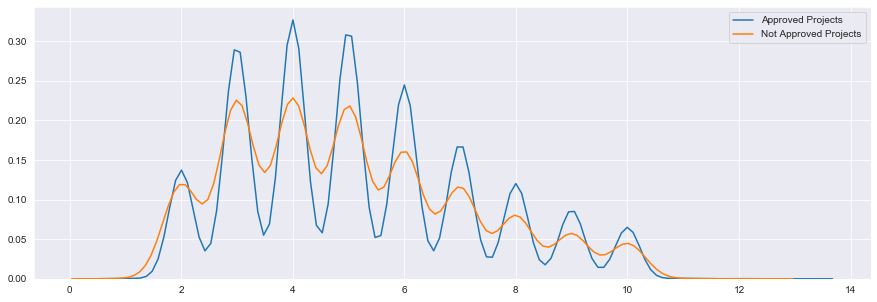

In [35]:
plt.figure(figsize=(15,5))
sb.distplot(approved_word_count, hist=False, label="Approved Projects")
sb.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [36]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

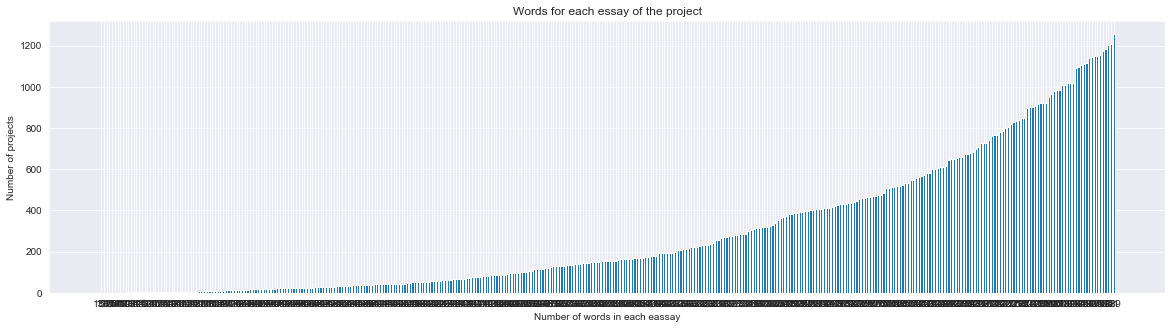

In [37]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['essay'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in each eassay')
plt.title('Words for each essay of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

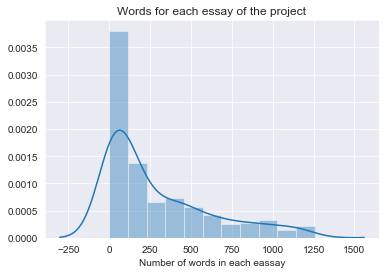

In [38]:
sb.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.show()


In [39]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

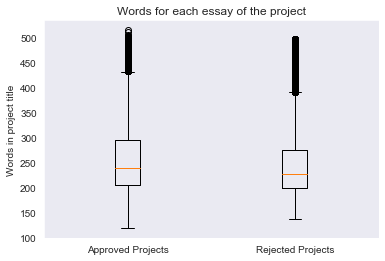

In [40]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

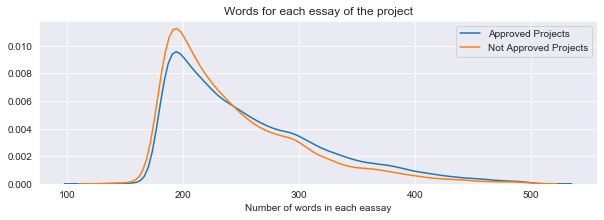

In [41]:
plt.figure(figsize=(10,3))
sb.distplot(approved_word_count, hist=False, label="Approved Projects")
sb.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### 1.2.8 Univariate Analysis: Cost per project

In [42]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [43]:
price_data = resource_data.groupby(by = 'id').sum().reset_index()
price_data.head()

,id,quantity,price
0,p000001,7,459.56
1,p000002,21,515.89
2,p000003,4,298.97
3,p000004,98,1113.69
4,p000005,8,485.99


In [44]:
price_data.shape

(260115, 3)

In [45]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [46]:
approved_price = project_data.query("project_is_approved == 1")['price'].values # this is the equivalent way of writing:
                                                                                 # project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data.query("project_is_approved == 0")['price'].values

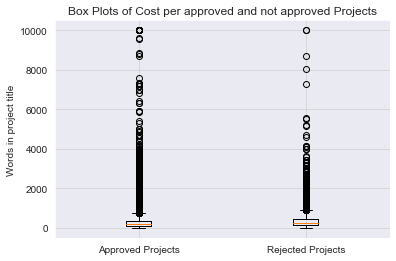

In [47]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid('show', color = 'lightgrey')
plt.show()

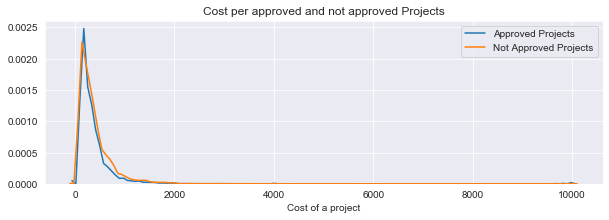

In [48]:
plt.figure(figsize=(10,3))
sb.distplot(approved_price, hist=False, label="Approved Projects")
sb.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [49]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

project_data.head(3)